In [1]:
from model.cnn import ConvNet
from model.train import train

import torch.optim as optim

from PIL import Image
from model.cnn import ConvNet

from model.dataloader import load_data
from model.train import train
import torch
import matplotlib.pyplot as plt

### Load GTZAN data

The "Data" folder should be placed at "dataset" directory

In [2]:

dataloader=load_data()


999


c:\Users\iu889\source\repos\GTZAN Classification\model\dataloader.py:58: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ..\torch\csrc\utils\tensor_new.cpp:248.)
  torch_X_train = torch.FloatTensor(X_train)


Train shape:
torch.Size([849, 3, 128, 128])
Val shape:
torch.Size([75, 3, 128, 128])
Test shape:
torch.Size([75, 3, 128, 128])


In [3]:
import os
def save_checkpoint(model):
    """save model checkpoint"""
    model_out_path = "trained/model.pth"
    state = {"epoch": 0 ,"model": model}
    if not os.path.exists("trained/"):
        os.makedirs("trained/")

    torch.save(state, model_out_path)
        
    print("Checkpoint saved to {}".format(model_out_path))
    return model_out_path



In [3]:
model=ConvNet()
optimizer  = optim.Adam(model.parameters(), lr=1e-4,weight_decay=1e-3)
losses,acc=train(model,optimizer,dataloader,epochs=30)

epoch0
Training accuracy:
Got 18 / 128 correct (14.06)
Validation accuracy:
Iteration 0, loss = 2.3072
Got 5 / 75 correct (6.67)

epoch1
Training accuracy:
Got 37 / 128 correct (28.91)
Validation accuracy:
Iteration 0, loss = 2.1594
Got 11 / 75 correct (14.67)

epoch2
Training accuracy:
Got 53 / 128 correct (41.41)
Validation accuracy:
Iteration 0, loss = 2.0011
Got 20 / 75 correct (26.67)

epoch3
Training accuracy:
Got 60 / 128 correct (46.88)
Validation accuracy:
Iteration 0, loss = 1.7652
Got 25 / 75 correct (33.33)

epoch4
Training accuracy:
Got 56 / 128 correct (43.75)
Validation accuracy:
Iteration 0, loss = 1.6645
Got 28 / 75 correct (37.33)

epoch5
Training accuracy:
Got 74 / 128 correct (57.81)
Validation accuracy:
Iteration 0, loss = 1.4695
Got 29 / 75 correct (38.67)

epoch6
Training accuracy:
Got 79 / 128 correct (61.72)
Validation accuracy:
Iteration 0, loss = 1.2982
Got 30 / 75 correct (40.00)

epoch7
Training accuracy:
Got 89 / 128 correct (69.53)
Validation accuracy:
It

In [4]:
from model.train import check_accuracy
check_accuracy(dataloader["test"],model)

Got 44 / 75 correct (58.67)


0.5866666666666667

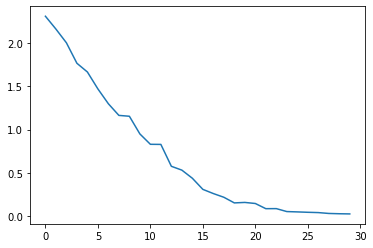

In [5]:


plt.plot(losses)
plt.show()

### Save model to file

In [19]:
save_checkpoint(model)

Checkpoint saved to trained/model.pth


'trained/model.pth'

### Load model and test

In [7]:
from model.train import check_accuracy
model = torch.load("trained/best_model.pth", map_location=lambda storage, location: storage)["model"]
check_accuracy(dataloader["test"],model)


Got 50 / 75 correct (66.67)


0.6666666666666666